# Data import, libraries

- Dupkala Michal
- Dvořák Jáchym
- Hartinger Dominik
- Ovčička Pavel

In [1]:
from google.cloud import vision
from google.oauth2 import service_account
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io
import numpy as np

In [5]:
creds = service_account.Credentials.from_service_account_file('./obraz/credentials.json')
client = vision.ImageAnnotatorClient(credentials=creds)

# First approach - recommending based on picture(s)

In [7]:
import os
path = './obraz/data/tym2'

def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [8]:
labels_images = {}

In [9]:
directories = os.listdir(path)

for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [11]:
liv = list(labels_images.values())

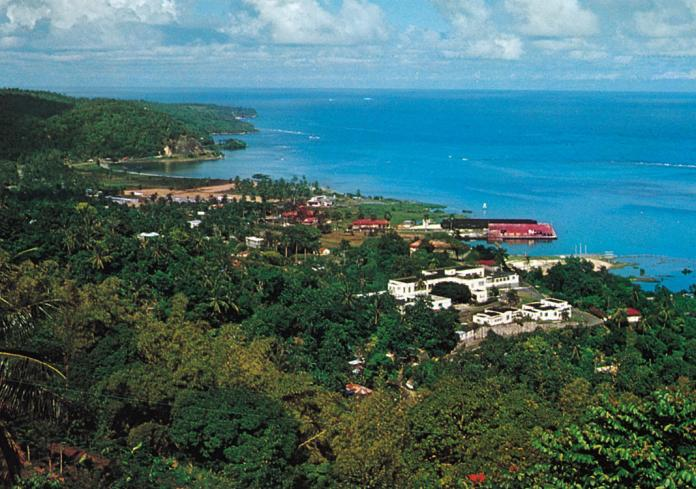

In [14]:
test_pic = './obraz/test_pic.jpg'
Image(test_pic)

In [15]:
test_pic = './obraz/test_pic.jpg'
def get_recommendation(test_pic=test_pic):
    #get labels from image
    with io.open(test_pic, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    response = client.label_detection(image = image)
    labels = response.label_annotations
    test_pic_labels = []
    for label in labels:
        test_pic_labels.append(label.description)
    #get similarity scores list 
    similarity_scores = []
    for sublist in liv: #labels_images_values_list
        similarity_scores.append(len(set(test_pic_labels)&set(sublist)))
    #find highest score
    ace = np.argmax(similarity_scores)
    #get the key with the ace index
    keylist = list(labels_images.keys())
    
    print('The best destination from our database closest to your photo:')
    return Image(keylist[ace])

The best destination from our database closest to your photo:


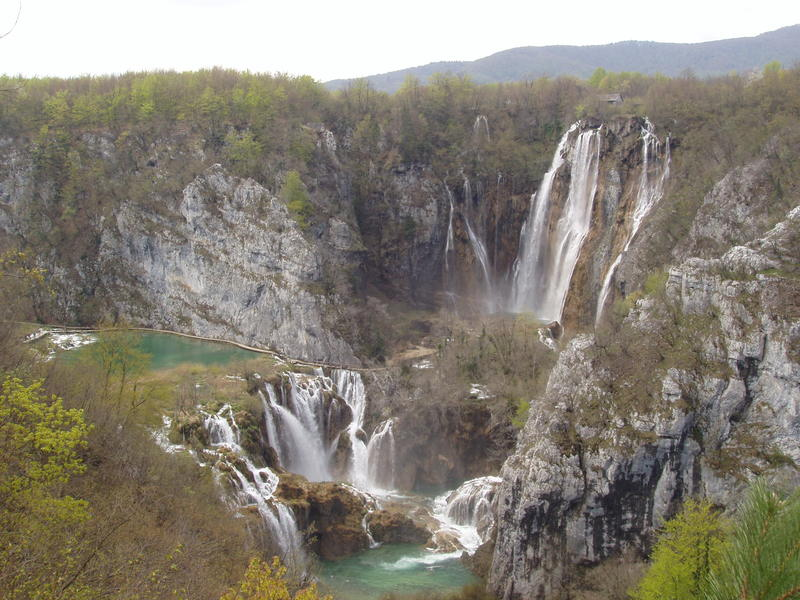

In [16]:
get_recommendation()

It would be nice to have labelled photos in the database to be actually able to name the destination right away.

# Second approach - selecting top keywords based on recognition precision

In [122]:
def get_top_keywords(threshold = 0.98, path = './obraz/data/tym2', top = 5):
    '''This function analyzes all images in specified folder, gets labels and scores for each label,
    then returns top X selected keywords based on a specified threshold.'''
    path = path
    labels_images = {}
    directories = os.listdir(path)
    for i in directories:
        lbls = get_labels(os.path.join(path, i))
        lbl_desc = [i.description for i in lbls]
        lbl_score = [i.score for i in lbls]
        labels_images[os.path.join(path, i)] = zip(lbl_desc, lbl_score)
    top_labels = {}
    for k, v in labels_images.items(): 
        v = list(v) 
        v = sorted(v, key = lambda x: x[1], reverse = True)
        for value in v:
            if value[1] > threshold:
                if value[0] in top_labels.keys():
                    continue
                else:
                    top_labels[value[0]] = value[1]
    print('We are most confident that you like these:')
    return sorted(top_labels.items(), key = lambda x: x[1], reverse = True)[:top]
    print('And we suggest these places: _')

In [123]:
get_top_keywords(threshold = 0.95, path = './obraz/data/tym2', top = 5)

We are most confident that you like these:


[('Body of water', 0.9869152903556824),
 ('Mountainous landforms', 0.983430802822113),
 ('Branch', 0.9830069541931152),
 ('Vegetation', 0.9822941422462463),
 ('Nature', 0.9821396470069885)]